# Step 0 - Setup and loading of files
#### Loading dplyr (R library)
#### Loading expeditions and members dataset and substituting missing values by NA
#### Checking (right number of rows and columns) and understanding both datasets

In [3]:
library(dplyr)
expeditions = read.csv(file="expeditions_all.csv", na.strings = "NA", header=TRUE, sep=";")
members = read.csv(file="members_all.csv", na.string = "NA", header=TRUE, sep=";")

dim(expeditions)
dim(members)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



[1] 9797   65

[1] 65534    65

# Step 1 - Selecting and filtering columns we need
#### Selecting columns from the expedition table I need (expid, success, season, o2used, nohired, totmembers)
#### Taking members table and filtering out all the members with H-A Worker Status (Helper or Assistants) as we only want to analyze climbers, not hired personal.
#### Grouping members by expedition id and calculating an average age of each expedition and total members to check if the aggreggated number of members per expedition is equal to totmember variable in expedition table

In [4]:
subset_expeditions = select(expeditions, expid, success, season, o2used, nohired, totmembers)
#filtered_members = filter(members, !status %in% c("H-A Worker"))
filtered_members = filter(members, !status == "H-A Worker")
subset_members = filtered_members  %>%
                    group_by(expid)  %>%
                    select(expid, calcage)  %>%
                    summarise(avg_age = mean(calcage),
                             total = n())
head(subset_members)
dim(subset_members)

expid,avg_age,total
ACHN15301,22.40000,5
ACHN15302,53.66667,9
AMAD00101,30.60000,5
AMAD00102,38.80000,5
AMAD00103,39.75000,4
AMAD00104,33.16667,6


[1] 9029    3

# Step 2 - Merging and coding variables in subsets of expedition and members table
#### Joining subsets of expedition and members table together based on expid variable
#### Coding o2used(o2use), nohired(nohire) and season(season_dichotomous) variables into 0 and 1.
#### Creating new solo variable based on totmembers. If totmembers is 0 or 1, we consider the expedition to be solo; Otherwise, it is not. 
#### Discarding pre-coded variables (o2used, nohired, season, total)

In [5]:
joined_dataset = left_join(subset_expeditions, subset_members, by="expid")
head(joined_dataset)
final_dataset <- joined_dataset %>% mutate(o2use = as.numeric(o2used), nohire = as.numeric(nohired)) %>% mutate(season_dichotomous = case_when
                                           (season == 1  | season == 2 ~ 0, season == 3 | season == 4 ~ 1, TRUE ~ NA_real_)) %>% mutate(solo = case_when(totmembers == 0 | totmembers == 1 ~ 1, totmembers > 1 ~ 0, TRUE ~ NA_real_))
head(final_dataset)
final_dataset %>% select (-c(o2used, nohired, season, total))

Warning message:
"Column `expid` joining factors with different levels, coercing to character vector"

expid,success,season,o2used,nohired,totmembers,avg_age,total
ANN260101,1,1,TRUE,FALSE,10,25.10000,10
ANN269301,1,3,FALSE,FALSE,10,25.60000,10
ANN273101,1,1,FALSE,FALSE,6,28.33333,6
ANN278301,0,3,FALSE,TRUE,2,32.50000,2
ANN279301,0,3,FALSE,TRUE,3,29.00000,3
ANN280101,0,1,FALSE,FALSE,6,29.33333,6


expid,success,season,o2used,nohired,totmembers,avg_age,total,o2use,nohire,season_dichotomous,solo
ANN260101,1,1,TRUE,FALSE,10,25.10000,10,1,0,0,0
ANN269301,1,3,FALSE,FALSE,10,25.60000,10,0,0,1,0
ANN273101,1,1,FALSE,FALSE,6,28.33333,6,0,0,0,0
ANN278301,0,3,FALSE,TRUE,2,32.50000,2,0,1,1,0
ANN279301,0,3,FALSE,TRUE,3,29.00000,3,0,1,1,0
ANN280101,0,1,FALSE,FALSE,6,29.33333,6,0,0,0,0


expid,success,totmembers,avg_age,o2use,nohire,season_dichotomous,solo
ANN260101,1,10,25.100000,1,0,0,0
ANN269301,1,10,25.600000,0,0,1,0
ANN273101,1,6,28.333333,0,0,0,0
ANN278301,0,2,32.500000,0,1,1,0
ANN279301,0,3,29.000000,0,1,1,0
ANN280101,0,6,29.333333,0,0,0,0
ANN280102,0,7,29.625000,0,0,0,0
ANN281302,0,19,37.736842,0,1,1,0
ANN281301,0,9,32.555556,0,0,1,0
ANN282301,0,5,31.800000,0,1,1,0


# Step 3 - Checking for missing values
#### Looking how many non available cells are there for each column/variable
#### Looking at how many unique values are left after previous steps
#### Creating a table for visual understanding of missing values

Loading required package: Rcpp
## 
## Amelia II: Multiple Imputation
## (Version 1.7.5, built: 2018-05-07)
## Copyright (C) 2005-2018 James Honaker, Gary King and Matthew Blackwell
## Refer to http://gking.harvard.edu/amelia/ for more information
## 


expid            success             season             o2used 
                 0                  0                  0                  0 
           nohired         totmembers            avg_age              total 
                 0                  0                767                767 
             o2use             nohire season_dichotomous               solo 
                 0                  0                  2                  0

expid            success             season             o2used 
              9796                  2                  5                  2 
           nohired         totmembers            avg_age              total 
                 2                 52               1742                 51 
             o2use             nohire season_dichotomous               solo 
                 2                  2                  3                  2

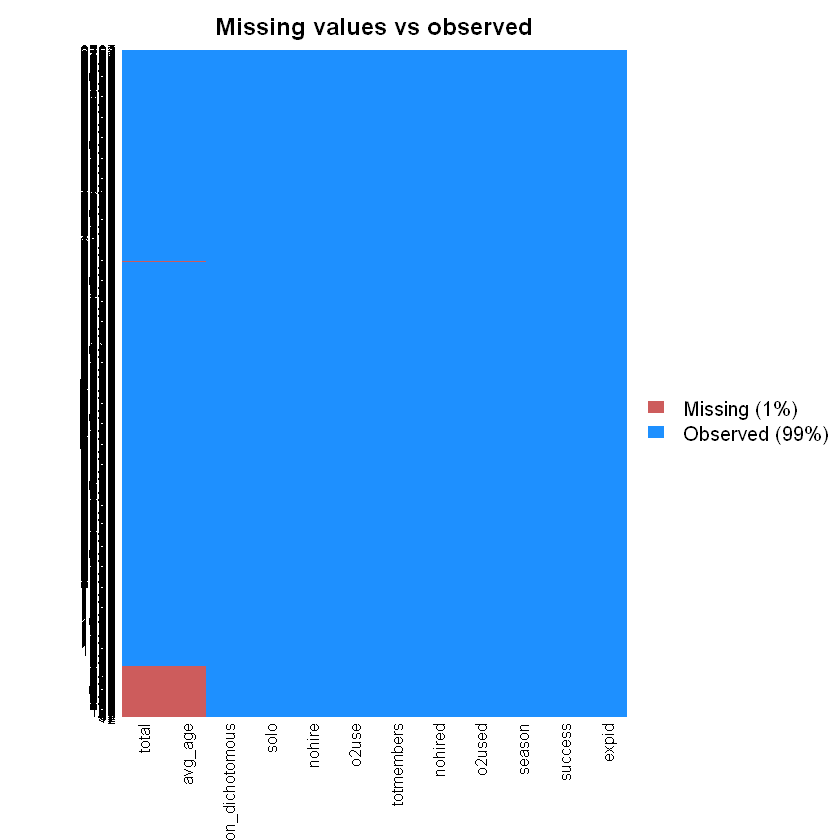

In [6]:
library(Amelia)
sapply(final_dataset,function(x) sum(is.na(x)))
sapply(final_dataset, function(x) length(unique(x)))
missmap(final_dataset, main="Missing values vs observed")

# Step 4 - Replacing missing avg_age values by the overall average_age
#### From the analysis in the previous cell, we found out that we are missing some avg_age data for a few expeditions. In this step, we are replacing those missing values by the total average age.

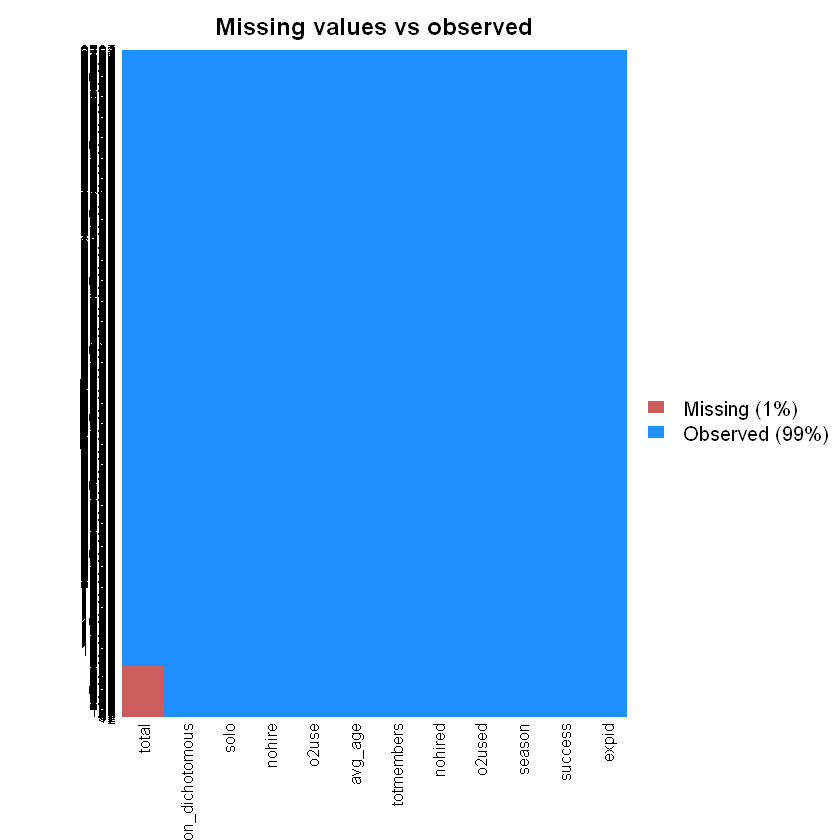

In [7]:
final_dataset$avg_age[is.na(final_dataset$avg_age)] <- mean(final_dataset$avg_age,na.rm=T)
missmap(final_dataset, main="Missing values vs observed")

# Step 5- Logit setup and first regression run
#### Setting up pseudo-random number generator to ensure reproducible results
#### Randomly shuffling our final dataset before dividing it into train and test part
#### Separating our final_dataset into train(60%) and test(40%) datasets
#### Running logistic regression with success as dependent variable and solo, nohire, totmembers, o2use, avg_age and season_dichotomous as independent variables)

In [19]:
set.seed(42)
n=nrow(final_dataset)
shuffled=final_dataset[sample(n),]
train.indices=1:round(0.75*n)
train.shuffled=shuffled[train.indices,]
test.indices=(round(0.75*n)+1):n
test.shuffled=shuffled[test.indices,]
glm.fit=glm(success~solo+nohire+totmembers+o2use+avg_age+season_dichotomous, family=binomial, data=train.shuffled)
summary(glm.fit)


Call:
glm(formula = success ~ solo + nohire + totmembers + o2use + 
    avg_age + season_dichotomous, family = binomial, data = train.shuffled)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.3179  -1.1019   0.6175   1.1857   1.6091  

Coefficients:
                    Estimate Std. Error z value Pr(>|z|)    
(Intercept)        -0.244882   0.123482  -1.983   0.0474 *  
solo               -0.335794   0.077196  -4.350 1.36e-05 ***
nohire              0.004844   0.054527   0.089   0.9292    
totmembers          0.023174   0.005601   4.137 3.52e-05 ***
o2use               1.564922   0.067870  23.058  < 2e-16 ***
avg_age            -0.006804   0.002705  -2.515   0.0119 *  
season_dichotomous  0.299473   0.052315   5.724 1.04e-08 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 10156.4  on 7345  degrees of freedom
Residual deviance:  9376.2  on 7339  degrees of freedom


## First regression run interpretation and next steps
The p-value of solo variable is close to zero, suggesting that this variable is indeed significant for success of the expedition. The estimated coefficient is negative, which means that going solo decreases odds of success.

The p-value of no hired personnal (Yes or no) is very high, suggesting that the variable is not statistically significant. In the next round, we will drop this variable.

The p-value for total members in expedition is very close to zero, making it significant determinor of expedition success.
The coefficient is positive but weak, suggesting that the more members the expedition has, the more likely it is to succeed.

The p-value for oxygen use is very low, again suggesting a high degree relevance for success of expedition. The coefficient is positive and very strong, making oxygen usage an important determiner of expedition succes. (If the expedition uses oxygen, it is more likely to succeed).

The p-value for average age is low, pointing at the significance of the age on success but the coefficient is negative and low. This can be interpreted as: The higher the average age of the expedition, the lower the chance of success. 

The p-value of season is also close to zero, which showcases a high relevance for success. And the coefficient is positive, which means that the likelihood to succeed in season 1 (Fall/Winter) is higher than in season 0 (Spring/Summer). This might seem counterintuitive in the first glance, but makes sense when we consider that summer is a prime season for monsoons, which bring heavy rainfall and mist, making the climb more dangerous.

# Step 6 - Revision and the second regression run
For the second run, we are excluding nohire (Whether an expedition hired a personal or not) as its p-value is clearly above 0.05. We will include the interaction term between all the other variables

In [34]:
glm.fit=glm(success~solo*totmembers*o2use*avg_age*season_dichotomous,family=binomial(link="logit"),data=train.shuffled)
summary(glm.fit)


Call:
glm(formula = success ~ solo * totmembers * o2use * avg_age * 
    season_dichotomous, family = binomial(link = "logit"), data = train.shuffled)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.2298  -1.1190   0.5831   1.1626   2.0084  

Coefficients: (3 not defined because of singularities)
                                                   Estimate Std. Error z value
(Intercept)                                        0.196114   0.305370   0.642
solo                                              -1.805553   1.137212  -1.588
totmembers                                         0.045675   0.033246   1.374
o2use                                              0.850336   0.686020   1.240
avg_age                                           -0.020893   0.008127  -2.571
season_dichotomous                                -0.194307   0.387004  -0.502
solo:totmembers                                    1.647393   1.173967   1.403
solo:o2use                                    

## Second regression run interpretation and next steps
It seems that the p-value of the interaction effect is close to zero only in two cases:

1- Between tot_members and o2use

2- Between tot_members, o2use and average age

All the others are either insignificant or not defined because of singularities

We will include those interaction terms into the model

# Step 7 - Evaluating prediction accuracy on our test data set
Now, we create a vector of class predictions based on whether the predicted probability of a success is greater than or less than 0.5 and compare the results to the actual values from the training set

In [33]:
dim(test.shuffled)
head(test.shuffled)
names(test.shuffled)
glm.fit=glm(success~totmembers*o2use*avg_age+solo+season_dichotomous,family=binomial(link="logit"),data=train.shuffled)
summary(glm.fit)

[1] 2449   12

,expid,success,season,o2used,nohired,totmembers,avg_age,total,o2use,nohire,season_dichotomous,solo
9357,MANA16315,1,3,FALSE,TRUE,2,37.57519,NA,0,1,1,0
6475,EVER09177,0,1,TRUE,FALSE,1,59.00000,1,1,0,0,1
9639,MANA17325,1,3,TRUE,FALSE,1,37.57519,NA,1,0,1,1
1822,NILS81301,0,3,FALSE,TRUE,3,27.00000,3,0,1,1,0
7602,EVER12161,1,1,TRUE,FALSE,6,39.33333,6,1,0,0,0
1488,EVER94110,0,1,TRUE,FALSE,6,37.66667,6,1,0,0,0


[1] "expid"              "success"            "season"            
 [4] "o2used"             "nohired"            "totmembers"        
 [7] "avg_age"            "total"              "o2use"             
[10] "nohire"             "season_dichotomous" "solo"


Call:
glm(formula = success ~ totmembers * o2use * avg_age + solo + 
    season_dichotomous, family = binomial(link = "logit"), data = train.shuffled)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.2180  -1.0883   0.6061   1.1703   2.0983  

Coefficients:
                           Estimate Std. Error z value Pr(>|z|)    
(Intercept)              -0.0350695  0.1529015  -0.229 0.818589    
totmembers                0.0154490  0.0184286   0.838 0.401853    
o2use                     1.3229511  0.3677122   3.598 0.000321 ***
avg_age                  -0.0147975  0.0039007  -3.794 0.000149 ***
solo                     -0.2878455  0.0786624  -3.659 0.000253 ***
season_dichotomous        0.2988989  0.0525262   5.690 1.27e-08 ***
totmembers:o2use         -0.1545111  0.0397607  -3.886 0.000102 ***
totmembers:avg_age        0.0006260  0.0005213   1.201 0.229801    
o2use:avg_age             0.0096821  0.0092591   1.046 0.295704    
totmembers:o2use:avg_age  0.0036128  0.

In [37]:
glm.probs=predict(glm.fit,train.shuffled,type="response")
glm.pred=rep("0", 7348)
glm.pred[glm.probs>0.5]="1"
table(glm.pred,train.shuffled$success)

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == :
"prediction from a rank-deficient fit may be misleading"

        
glm.pred    0    1
       0 2424 1743
       1 1027 2154

In [39]:
(2424+2154)/7348

[1] 0.6230267

### The results show, that the model makes a correct accident estimate in 62.3% of the cases. Now, we test it on the test data set.

In [38]:
glm.probs=predict(glm.fit,test.shuffled,type="response")
glm.pred=rep("0",2449)
glm.pred[glm.probs>0.5]="1"
table(glm.pred,test.shuffled$success)

Warning message in predict.lm(object, newdata, se.fit, scale = 1, type = ifelse(type == :
"prediction from a rank-deficient fit may be misleading"

        
glm.pred   0   1
       0 813 575
       1 352 709

In [40]:
(813+709)/2449

[1] 0.6214782

### On the test set, that has not been used for fitting, the model shows 62.14% accuracy.

# Step 8 - Key Takeaways and Recommendations
#### First key takeaway would be to avoid going solo. However, that suggestion would assume that it is not a deliberate choice of the climbers. Going solo is logically more dangerous but one would presume that climbers who undertake the climb solo are aware of the implications and do it for a challenge by choice.
#### Second implication is to use oxygen as it increases odds of success. However, as in the first recommendation many climbers are already aware of the risks associated with not using the oxygen (dehydration, fatigue, impaired judgement, mountain sickness and risk of death) and take the risk for a challenge voluntarily.
#### Third implication of this analysis is to choose winter/fall season over spring/summer season. We hypothesize that the likelihood of success is higher in winter/fall primarily because of monsoon season that makes transionary months(May, June) between spring and summer conditions more unpredictable than fall/winter months where there is a clearer transition between fall and winter. The season can also be highly relevant for a specific route. Meaning that some routes can offer more or less suitable climbing conditions during specific seasons. However, further qualitative and quantitative research into why fall might be better than spring for climbing would be beneficial.
#### Lastly, average age of the expedition also plays a role in a success of the climb. When "younger" expeditions have higher chance of succeeding. However, the coefficient is fairly low so there is a limited benefit to that, which makes sense because there is a tradeoff between experience and "youth"(vitality, physical condition, etc.). 

## Estimate of impact

The impact of our findings is not very high, since our recommendations for avoiding solo climbs and use of oxygen are common knowledge and climbers who take those risks are acutely aware od the dangers associated with them.

Third implication is a little bit counterintuitive for a layman, but probably more of a common knowledge for any climber who attempts to climb the Everest as he or she needs to understand the weather conditions very acutely.

Last implication more or less serves as a proof for our intution and logic that would tell us that the younger climbers have higher chance of succes because they are more likely better off physically than older climbers. 

## Limitations and Weaknesses of our analysis
We replaced the missing avg_age values (Roughly 1% of our data) by a total avg_age. That could have some impact on the accuracy of the model
We shuffled the dataset because initially, it was ordered by expid so just to be on the save side we shuffled it to ensure a random distribution across test and train dataset.